**Shill Bidding Dataset**

**Description**

Creators scraped a large number of eBay auctions of a popular product. After preprocessing the auction data, they created the SB dataset.   It is a multivariate dataset with 6321 instances and 13 features.

**Location**

https://archive.ics.uci.edu/dataset/562/shill+bidding+dataset

**Variable Information**

- Record ID: Unique identifier of a record in the dataset.
- Auction ID: Unique identifier of an auction.
- Bidder ID: Unique identifier of a bidder.
- Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot.  This is a collusive act involving the fraudulent seller and an accomplice.
- Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.
- Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.
- Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning - the auction.
- Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.
- Auction Starting Price:  a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.
- Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.
- Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions. 
- Auction Duration:  How long an auction lasted.
- Class: 0 for normal behaviour bidding; 1 for otherwise.

In [3]:
import pandas as pd

# Download the dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00562/Shill%20Bidding%20Dataset.csv"
url = "../data/Shill Bidding Dataset.csv" # use local dataset within the repo instead.

# Load into a DataFrame
df = pd.read_csv(url)

# Convert Record_ID to object  
df['Record_ID'] = df['Record_ID'].astype(str)

# Convert Auction_ID to object  
df['Auction_ID'] = df['Auction_ID'].astype(str)

# Set Record_ID as index  
df.set_index('Record_ID', inplace=True)

# Remove Class variable from data - save for later use
target = df['Class']
df = df.drop(['Class'], axis=1)

In [4]:
# Basic dataset info
df.info()

# First few rows
print(df.head())

# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)
# Check for duplicate records
print(f"Number of duplicate rows: {df.duplicated().sum()}")


<class 'pandas.core.frame.DataFrame'>
Index: 6321 entries, 1 to 15144
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Auction_ID              6321 non-null   object 
 1   Bidder_ID               6321 non-null   object 
 2   Bidder_Tendency         6321 non-null   float64
 3   Bidding_Ratio           6321 non-null   float64
 4   Successive_Outbidding   6321 non-null   float64
 5   Last_Bidding            6321 non-null   float64
 6   Auction_Bids            6321 non-null   float64
 7   Starting_Price_Average  6321 non-null   float64
 8   Early_Bidding           6321 non-null   float64
 9   Winning_Ratio           6321 non-null   float64
 10  Auction_Duration        6321 non-null   int64  
dtypes: float64(8), int64(1), object(2)
memory usage: 592.6+ KB
          Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
Record_ID                                                        
1           

In [5]:
print(df.isnull().sum())  # Count of missing values per column
print(df.isna().sum().sum())  # Total missing values in dataset

Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
dtype: int64
0


No missing values

In [6]:
print(df.describe())  # Summary statistics for numerical columns
# Exclude non-feature columns for analysis
exclude_columns = ['Record_ID', 'Auction_ID']
df_numeric = df.drop(columns=exclude_columns, errors='ignore').select_dtypes(include=['number'])

# Analyze Auction_ID to determine if it should be categorical
print(df['Auction_ID'].value_counts())

# Convert Auction_ID to categorical if it has a reasonable number of unique values
if df['Auction_ID'].nunique() < df.shape[0] * 0.05:  # Example threshold: less than 5% of dataset size
    df['Auction_ID'] = df['Auction_ID'].astype('category')
    print("Auction_ID converted to categorical.")
else:
    print("Auction_ID left as is.")

# Outlier detection using IQR method
import numpy as np

Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print("Outliers per column:\n", outliers)


       Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
count      6321.000000    6321.000000            6321.000000   6321.000000   
mean          0.142541       0.127670               0.103781      0.463119   
std           0.197084       0.131530               0.279698      0.380097   
min           0.000000       0.011765               0.000000      0.000000   
25%           0.027027       0.043478               0.000000      0.047928   
50%           0.062500       0.083333               0.000000      0.440937   
75%           0.166667       0.166667               0.000000      0.860363   
max           1.000000       1.000000               1.000000      0.999900   

       Auction_Bids  Starting_Price_Average  Early_Bidding  Winning_Ratio  \
count   6321.000000             6321.000000    6321.000000    6321.000000   
mean       0.231606                0.472821       0.430683       0.367731   
std        0.255252                0.489912       0.380785       0

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts())

Auction_ID: 807 unique values
Auction_ID
589     26
1872    26
256     24
658     24
2498    23
        ..
1756     1
548      1
1971     1
458      1
2329     1
Name: count, Length: 807, dtype: int64
Bidder_ID: 1054 unique values
Bidder_ID
a***a    112
n***t     85
e***e     67
i***a     50
r***r     49
        ... 
n***y      1
u***z      1
t***9      1
z***b      1
9***7      1
Name: count, Length: 1054, dtype: int64


In [8]:
# Check column data types
print(df.dtypes)

# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Check if df_numeric is empty (i.e., if all columns were non-numeric)
if df_numeric.shape[1] == 0:
    print("No numeric columns found. Check your dataset.")
else:
    print("Numeric columns found:", df_numeric.columns)

Auction_ID                 object
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
dtype: object
Numeric columns found: Index(['Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
       'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average',
       'Early_Bidding', 'Winning_Ratio', 'Auction_Duration'],
      dtype='object')


In [9]:
for col in df_numeric.columns:
    non_numeric_values = df[col][~df[col].astype(str).str.replace('.', '', 1).str.isnumeric()]
    if not non_numeric_values.empty:
        print(f"Non-numeric values found in column '{col}':")
        print(non_numeric_values.unique())

Non-numeric values found in column 'Last_Bidding':
[2.77778e-05 3.80291e-05 1.15741e-05 4.96030e-06 7.10979e-05 1.62037e-05
 6.94440e-06 9.25930e-06 1.32275e-05 8.10185e-05 1.65340e-06 4.62960e-06
 9.92060e-06 9.25926e-05 4.46429e-05 2.31480e-06 1.81878e-05 6.11772e-05
 3.30690e-06 6.61380e-06 1.54321e-05 8.26720e-05 7.71600e-06 2.31481e-05
 6.94444e-05 5.78704e-05 4.62963e-05 3.47222e-05 2.48016e-05 1.38889e-05
 1.92901e-05 8.10190e-06 4.96032e-05 1.65344e-05 8.26720e-06 3.08642e-05
 3.85800e-06 6.17284e-05 3.24074e-05 2.81085e-05 2.54630e-05 1.48810e-05
 7.63889e-05 5.62169e-05 4.24383e-05 7.77116e-05 9.02778e-05 8.48765e-05
 6.55864e-05 3.96825e-05 2.70062e-05 4.13360e-05 1.85185e-05 5.01543e-05
 4.74537e-05 2.08333e-05 3.47220e-06 9.75529e-05 2.14947e-05 1.98413e-05
 5.55556e-05 7.71605e-05 4.79497e-05 9.64506e-05 8.92857e-05 1.73611e-05
 7.29167e-05 9.92063e-05 4.29894e-05 7.27513e-05 3.85802e-05 3.14153e-05
 7.87037e-05 6.61376e-05 5.45635e-05 1.04167e-05 5.67130e-05 3.63757e-05]

In [10]:
df['Last_Bidding'] = pd.to_numeric(df['Last_Bidding'], errors='coerce')
df['Early_Bidding'] = pd.to_numeric(df['Early_Bidding'], errors='coerce')

In [11]:
print(df[['Last_Bidding', 'Early_Bidding']].dtypes)  # Should now be float64
print(df[['Last_Bidding', 'Early_Bidding']].isna().sum())  # Check again for NaNs

Last_Bidding     float64
Early_Bidding    float64
dtype: object
Last_Bidding     0
Early_Bidding    0
dtype: int64


In [12]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
df_numeric = df_numeric.drop(columns=['Bidder_ID'], errors='ignore')  # Drop Bidder_ID if present

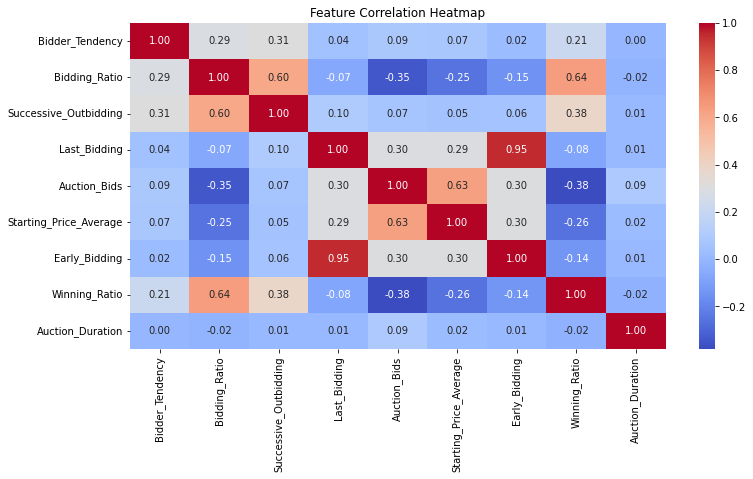

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

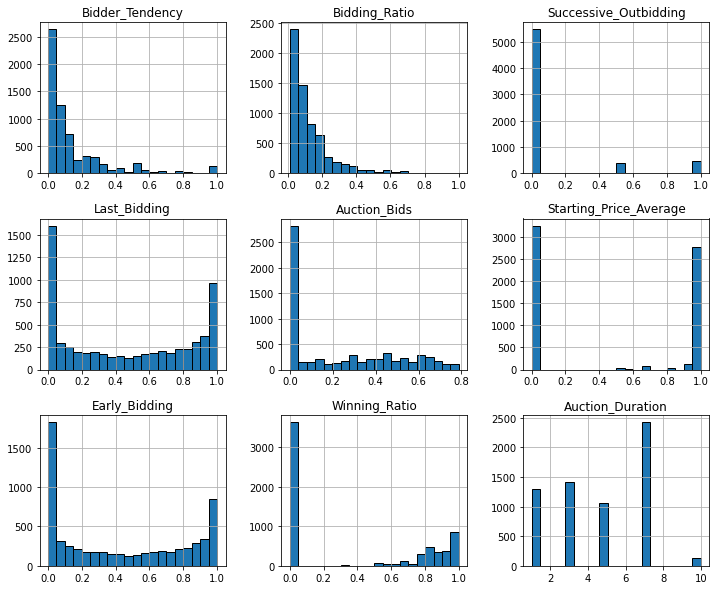

In [14]:
df_numeric = df.select_dtypes(include=['number'])  # Keep only numeric columns
df_numeric.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.show()

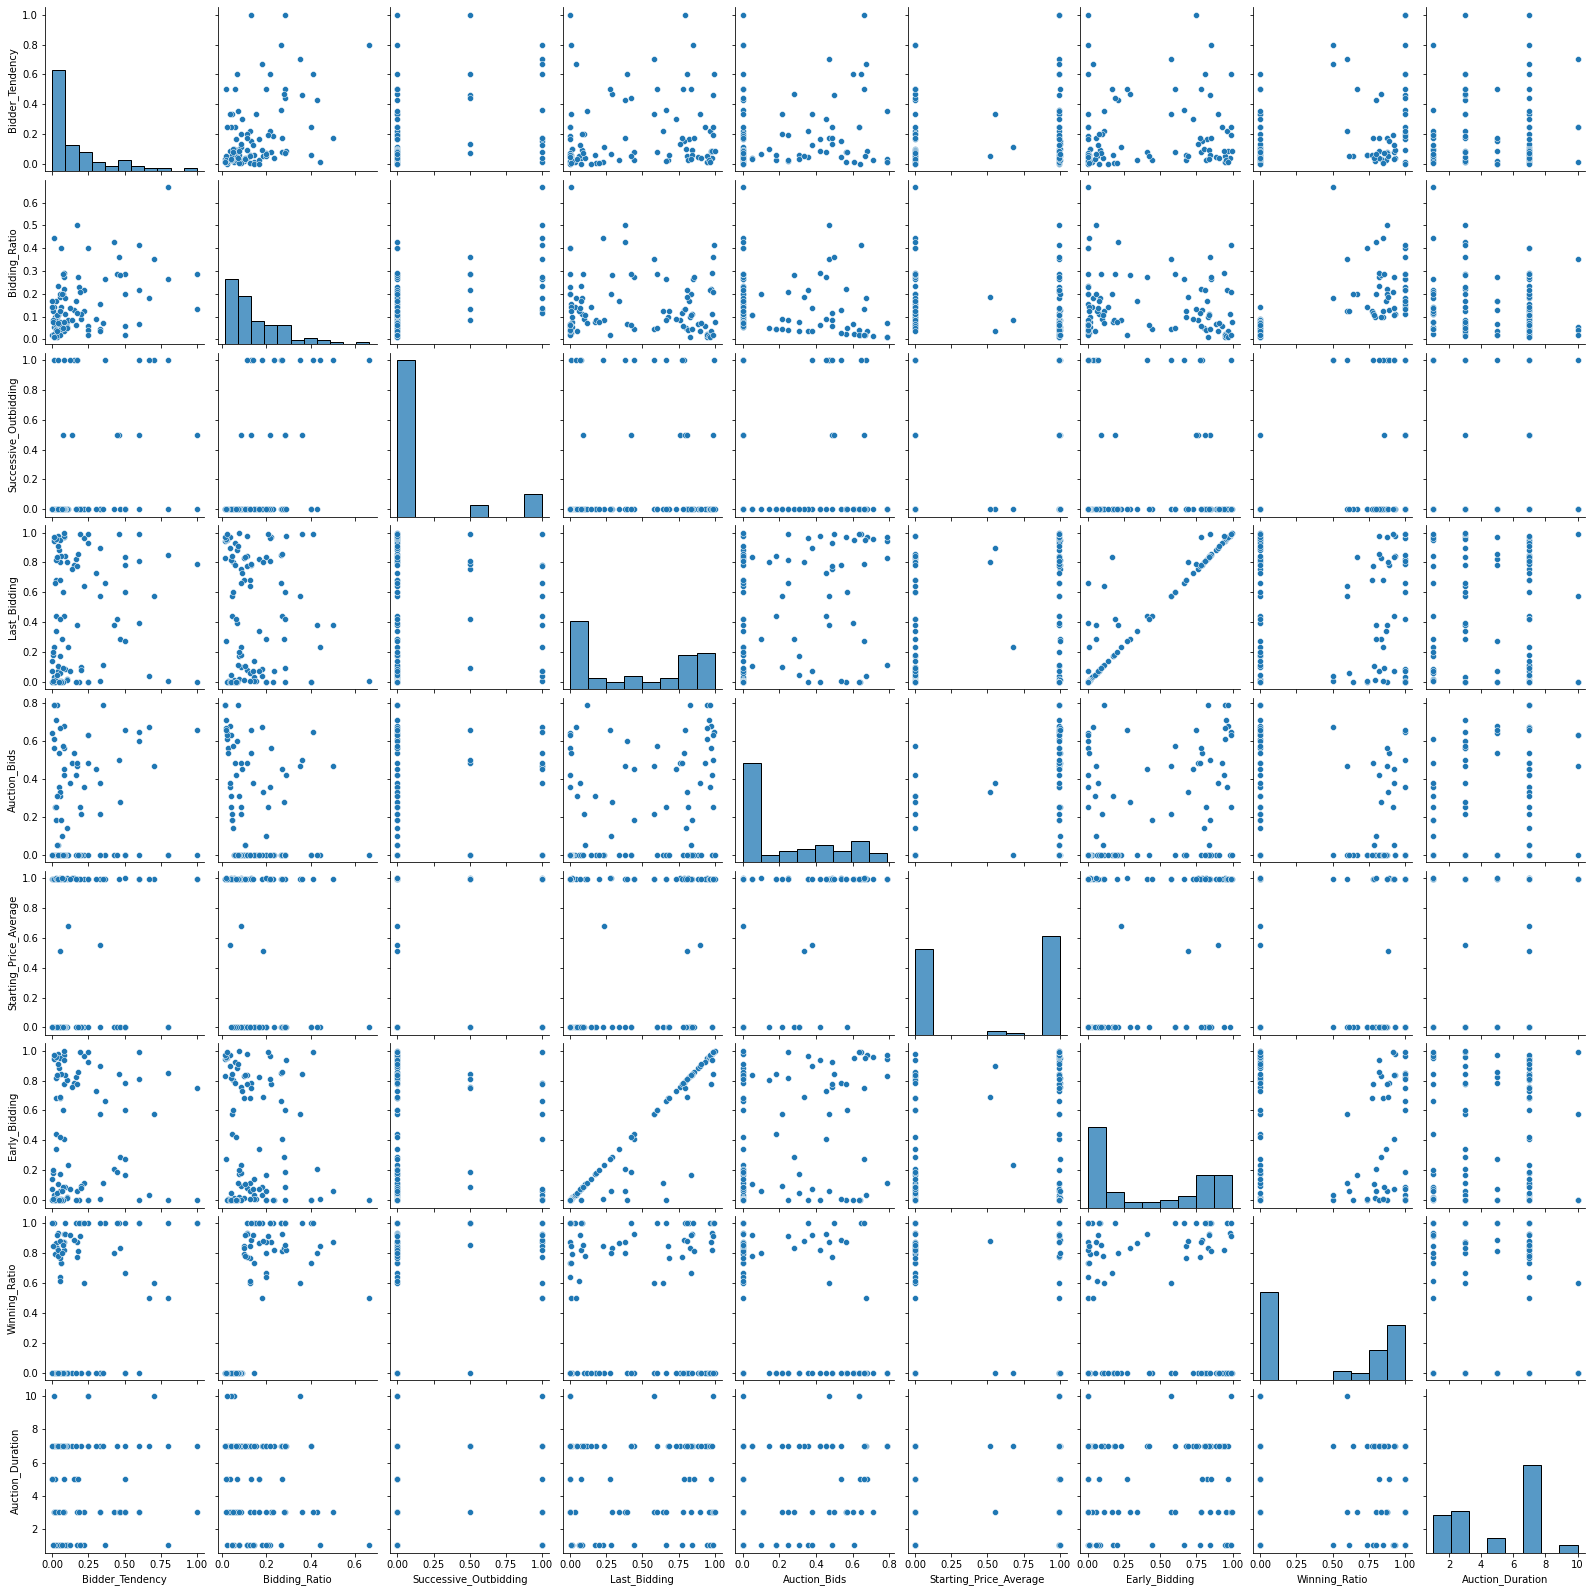

In [15]:
import seaborn as sns

df_numeric = df.select_dtypes(include=['number'])  # Select numeric columns
sns.pairplot(df_numeric.sample(100))  # Sample to speed up plotting
plt.show()

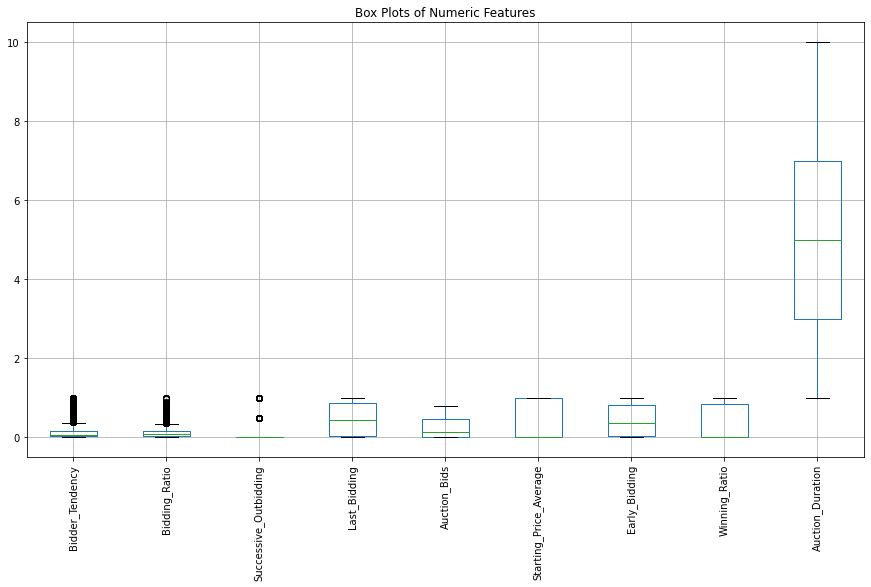

In [16]:

plt.figure(figsize=(15, 8))
df_numeric.boxplot(rot=90)
plt.title("Box Plots of Numeric Features")
plt.show()


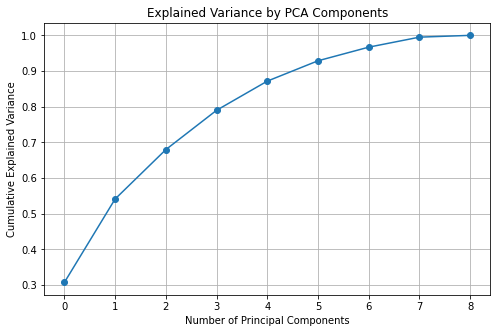

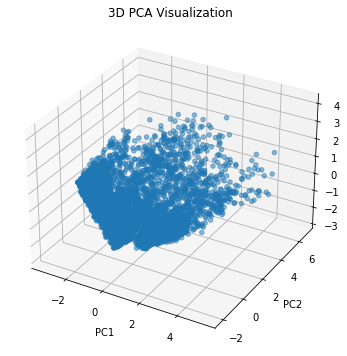

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardize before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA transformation
pca = PCA(n_components=None)
df_pca = pca.fit_transform(df_scaled)

# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

# If PC1 and PC2 explain less than 80% variance, consider a 3D PCA plot
if np.cumsum(pca.explained_variance_ratio_)[1] < 0.80:
    from mpl_toolkits.mplot3d import Axes3D

    pca_3d = PCA(n_components=3)
    df_pca_3d = pca_3d.fit_transform(df_scaled)

    # Convert to DataFrame
    df_pca_3d = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'])

    # 3D Scatter plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], alpha=0.5)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.title("3D PCA Visualization")
    plt.show()


**Optimal eps and min sample Selection for DBSCAN**

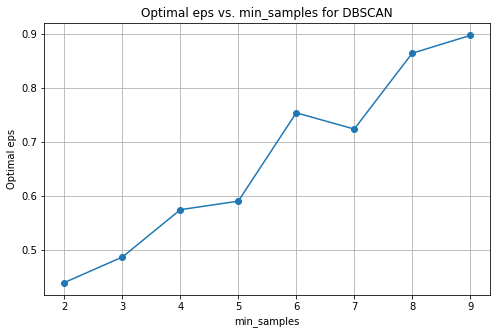

Optimal min_samples for DBSCAN: 9


In [18]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define a range of min_samples values to test
min_samples_values = range(2, 10)

# Store average k-distance for each min_samples
eps_values = []

for min_samples in min_samples_values:
    # Compute k-distances
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors.fit(df_pca_3d)
    distances, indices = neighbors.kneighbors(df_pca_3d)

    # Sort and take the k-th nearest distance
    sorted_distances = np.sort(distances[:, -1])

    # Find the knee (elbow point)
    kneedle = KneeLocator(range(len(sorted_distances)), sorted_distances, curve="convex", direction="increasing")
    optimal_eps = sorted_distances[kneedle.elbow]

    eps_values.append(optimal_eps)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(min_samples_values, eps_values, marker="o")
plt.xlabel("min_samples")
plt.ylabel("Optimal eps")
plt.title("Optimal eps vs. min_samples for DBSCAN")
plt.grid(True)
plt.show()

# Print best min_samples value
best_min_samples = min_samples_values[np.argmax(eps_values)]
print(f"Optimal min_samples for DBSCAN: {best_min_samples}")

Optimal epsilon (eps) for DBSCAN: 0.8979802091362157


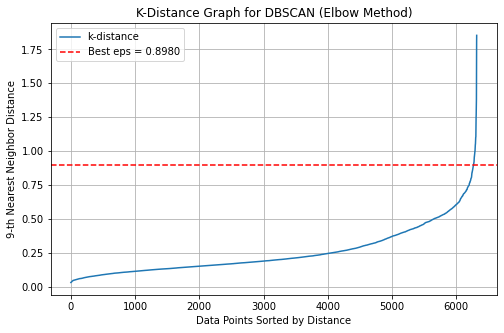

In [19]:
import numpy as np

# Set min_samples for DBSCAN
min_samples = 9

# Fit NearestNeighbors to find k-th nearest neighbor distances
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors.fit(df_pca_3d)
distances, indices = neighbors.kneighbors(df_pca_3d)

# Sort the distances (use only the k-th nearest neighbor distance)
distances = np.sort(distances[:, -1])

# Find the optimal eps using the KneeLocator (Elbow Method)
kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
best_eps = distances[kneedle.elbow]  # Extract the best epsilon value

# Print the best eps
print(f"Optimal epsilon (eps) for DBSCAN: {best_eps}")

# Plot the k-distance graph with the elbow point
plt.figure(figsize=(8, 5))
plt.plot(distances, label="k-distance")
plt.axhline(y=best_eps, color='r', linestyle='--', label=f"Best eps = {best_eps:.4f}")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel(f"{min_samples}-th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN (Elbow Method)")
plt.legend()
plt.grid(True)
plt.show()

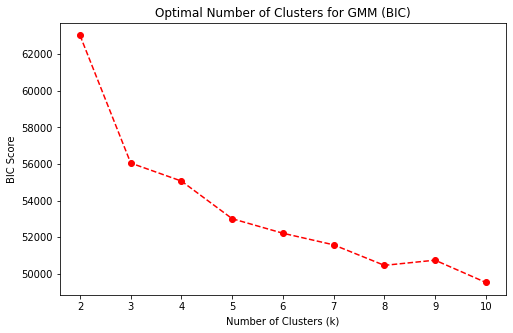

In [20]:
from sklearn.mixture import GaussianMixture

bic_scores = []  # Initialize an empty list to store BIC scores

for k in range(2, 11):  # Iterate over different numbers of clusters (from 2 to 10)
    gmm = GaussianMixture(n_components=k, random_state=42)  # Initialize Gaussian Mixture Model with k clusters
    gmm.fit(df_pca_3d)  # Fit the model to the data
    bic_scores.append(gmm.bic(df_pca_3d))  # Compute and store the Bayesian Information Criterion (BIC) score


# Plot BIC scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), bic_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("BIC Score")
plt.title("Optimal Number of Clusters for GMM (BIC)")
plt.show()

In [21]:
from sklearn.cluster import SpectralClustering, DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from pyclustering.cluster.clique import clique

# Clustering Algorithms
clustering_algorithms = {
    "Spectral Clustering": SpectralClustering(n_clusters=2, affinity='rbf', random_state=42),
    "BIRCH": Birch(n_clusters=2, threshold = 0.4, branching_factor=45),
    "DBSCAN": DBSCAN(eps=0.8979802091362088, min_samples=9),
    "Gaussian Mixture Model": GaussianMixture(n_components=5, random_state=42),
    "CLIQUE": clique
}

In [22]:
from sklearn.preprocessing import StandardScaler

# Compute Clustering Results
cluster_results = {}
validation_scores = {}

# Fit each clustering model and store results
for name, algorithm in clustering_algorithms.items():
    if name == "CLIQUE":
        # CLIQUE instantiation
        clique_instance = clique(df_pca_3d.to_numpy(), 7, 8)
        clique_instance.process()
        clusters = clique_instance.get_clusters()

        # Assign labels manually
        labels = [-1] * len(df_pca)  # Default label for noise points
        for cluster_id, cluster in enumerate(clusters):
            for idx in cluster:
                labels[idx] = cluster_id  # Assign each point to a cluster

    elif name == "DBSCAN":
        # Use scaled features for DBSCAN
        labels = algorithm.fit_predict(df_pca_3d)

    else:
        # Fit sklearn-compatible models with original features
        labels = algorithm.fit_predict(df_pca_3d)

    cluster_results[name] = labels  # Store cluster labels

# Now iterate over cluster_results (which is no longer empty)
for name, labels in cluster_results.items():
    unique_labels = set(labels)
    print(f"{name} - Unique Clusters Found: {len(unique_labels)}")

Spectral Clustering - Unique Clusters Found: 2
BIRCH - Unique Clusters Found: 2
DBSCAN - Unique Clusters Found: 2
Gaussian Mixture Model - Unique Clusters Found: 5
CLIQUE - Unique Clusters Found: 2


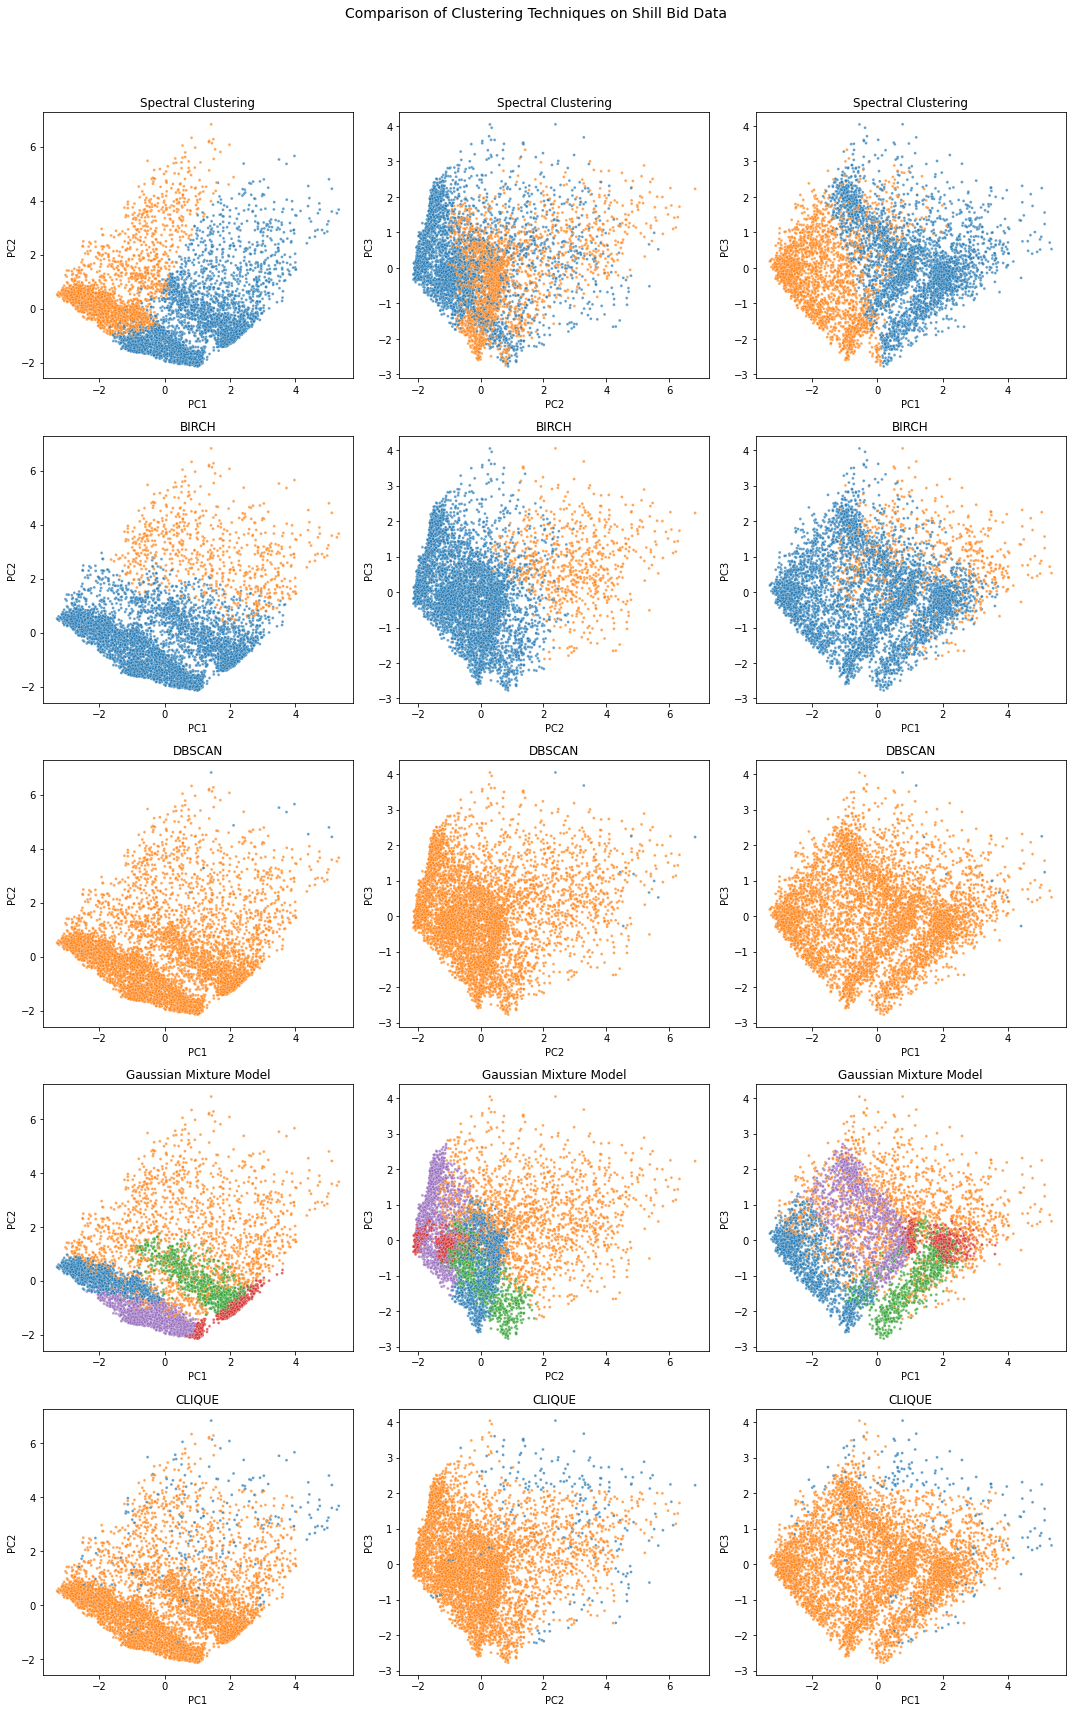

In [23]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score

# Compute validation metrics for each clustering method
for name, labels in cluster_results.items():
    # Choose the correct dataset based on the clustering algorithm
    data = df_pca_3d

    # Compute clustering validation metrics only if there is more than one cluster
    if len(set(labels)) > 1:  # Silhouette Score requires at least 2 clusters
        silhouette = silhouette_score(data, labels)
    else:
        silhouette = -1  # Assign -1 when only one cluster exists to avoid errors

    # Compute Davies-Bouldin Index (lower is better)
    db_index = davies_bouldin_score(data, labels)

    # Compute Calinski-Harabasz Index (higher is better)
    ch_index = calinski_harabasz_score(data, labels)

    ari = adjusted_rand_score(target, labels)

    # Store validation scores in a dictionary
    validation_scores[name] = {
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index,
        "Calinski-Harabasz Index": ch_index,
        "Adjusted-Rand Score": ari
    }

# Get the number of clustering methods used
num_clusters = len(cluster_results)

# Create subplots dynamically based on the number of clustering techniques
fig, axes = plt.subplots(num_clusters, 3, figsize=(15, 5 * num_clusters))
fig.suptitle("Comparison of Clustering Techniques on Shill Bid Data", fontsize=14)

# If only one clustering method exists, make sure axes is iterable
if num_clusters == 1:
    axes = [axes]

# Iterate through the clustering results and visualize the clusters
for i, (name, labels) in enumerate(cluster_results.items()):
    unique_labels = len(set(labels))  # Get number of unique clusters
    palette = sns.color_palette("tab10", n_colors=unique_labels)  # Define color palette

    for j in range(3):

        # set features to plot based on j
        if j == 0:
            x = df_pca_3d["PC1"]
            xlabel = "PC1"
            
            y = df_pca_3d["PC2"]
            ylabel = "PC2"
    
        elif j==1:
            x = df_pca_3d["PC2"]
            xlabel = "PC2"
            
            y = df_pca_3d["PC3"]
            ylabel="PC3"
    
        else:
            x = df_pca_3d["PC1"]
            xlabel = "PC1"
            
            y = df_pca_3d["PC3"]
            ylabel="PC3"
        
        # Scatter plot for visualizing clustering on Recency vs Frequency
        sns.scatterplot(
            x=x,
            y=y,
            
            hue=labels,  # Color clusters by labels
            palette=palette,  # Use color palette based on unique labels
            alpha=0.7,  # Set transparency for better visibility
            s=8,  # Set point size
            ax=axes[i, j]  # Assign plot to the respective subplot
        )
    
        # Set plot title and axis labels
        axes[i,j].set_title(f"{name}")
        axes[i,j].set_xlabel(xlabel)
        axes[i,j].set_ylabel(ylabel)
    
        # Remove legends from each subplot to avoid redundancy
        axes[i, j].legend([], frameon=False)

# Adjust layout to prevent overlapping labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

In [24]:
# Convert validation scores to DataFrame
validation_df = pd.DataFrame(validation_scores).T

# Print the validation scores
validation_df

,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Adjusted-Rand Score
Spectral Clustering,0.330729,1.288741,2857.991950,0.005217
BIRCH,0.391242,1.111091,1985.032342,0.773850
DBSCAN,0.493524,0.753521,58.219351,0.020483
Gaussian Mixture Model,0.181679,1.307371,1818.371861,0.016704
CLIQUE,0.336017,1.551502,400.060088,0.237312


In [25]:
# Plot what the true labels are for visual comparison
ground_truth = df_pca_3d.assign(truth=target.values)



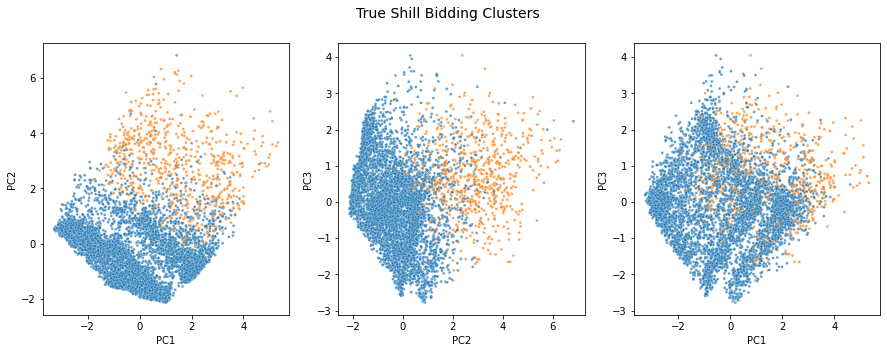

In [26]:
# Create subplots dynamically based on the number of clustering techniques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("True Shill Bidding Clusters", fontsize=14)
palette = sns.color_palette("tab10", n_colors=2)  # Define color palette
for i in range(3):

    # set features to plot based on j
    if i == 0:
        x = ground_truth["PC1"]
        xlabel = "PC1"
        
        y = ground_truth["PC2"]
        ylabel = "PC2"

    elif i==1:
        x = ground_truth["PC2"]
        xlabel = "PC2"
        
        y = ground_truth["PC3"]
        ylabel="PC3"

    else:
        x = ground_truth["PC1"]
        xlabel = "PC1"
        
        y = ground_truth["PC3"]
        ylabel="PC3"
    
    # Scatter plot for visualizing clustering on Recency vs Frequency
    sns.scatterplot(
        data=ground_truth,
        x=x,
        y=y,
        
        hue='truth',  # Color clusters by labels
        palette=palette,  # Use color palette based on unique labels
        alpha=0.7,  # Set transparency for better visibility
        s=8,  # Set point size
        ax=axes[i]  # Assign plot to the respective subplot
    )

    # Set plot title and axis labels
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel(ylabel)

    # Remove legends from each subplot to avoid redundancy
    axes[i].legend([], frameon=False)

# Adjust layout to prevent overlapping labels
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()